### Natural Language Toolkit (NLTK) and other tools

* open-source package in Python. 
* provides all common NLP Tasks from tokenization, stemming, tagging, parsing, and beyond.
* Other useful tools
    - BeautifulSoup: Library for extracting data from HTML and XML documents

#### A first taste of NLTK

In [3]:
import nltk
nltk.download('stopwords')


ModuleNotFoundError: No module named 'nltk'

### Preprocessing Data 1: Cleaning up and structuring

#### Remove punctuation


In [ ]:
import string
string.punctuation

In [ ]:
mytext="Text mining (a.k.a. text analytics) transforms the unstructured text into normalized, structured data suitable for analysis or machine learning algorithms."
mytext

In [ ]:
remove_punct=lambda x: "".join([char for char in x if char not in string.punctuation])

mytext=remove_punct(mytext)

In [ ]:
mytext

#### Tokenization


In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(mytext.lower())  #We convert to lower as Python is case-sensitive. 
print(tokens)

In [ ]:
print(type(tokens))

#### Remove stopwords


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
print(tokens)

In [ ]:
stop_words

### Preprocessing Data 2: Stemming and Lemmatization in Python

#### PorterStemmer


In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stems=[porter.stem(t) for t in tokens]
stems
# 'analyt', 'unstructur', 'suitabl' are not actual words

#### LancasterStemmer

In [ ]:
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()
[lancaster.stem(t) for t in tokens]
# 'min', 'dat' are words but they are overstemmed.

#### Snowball Stemmer


In [ ]:
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")
[snowBallStemmer.stem(word) for word in tokens]

In [ ]:
snowBallStemmer.languages

### Lemmatization


* Tools for lemmatization
    - <b>Wordnet Lemmatizer</b>
    - Spacy Lemmatizer
    - TextBlob
    - CLiPS Pattern
    - Stanford CoreNLP
    - Gensim Lemmatizer
    - TreeTagger

### Wordnet Lemmatizer

* Wordnet is an large, freely and publicly available lexical database for the English language aiming to establish structured semantic relationships between words. 
* It offers lemmatization capabilities as well and is one of the earliest and most commonly used lemmatizers.
* NLTK offers an interface to it, but you have to download it first in order to use it. 

In [ ]:
wn = nltk.WordNetLemmatizer()
[wn.lemmatize(word) for word in tokens]

#### Wordnet Lemmatizer with appropriate POS tag

* part-of-speech (POS)
* the same word can have multiple different 'lemma's
* Parts of speech Tagging is responsible for reading the text in a language and assigning some specific token (Parts of Speech) to each word.
* So, based on the context it’s used, you should identify the ‘part-of-speech’ (POS) tag for the word in that specific context and extract the appropriate lemma

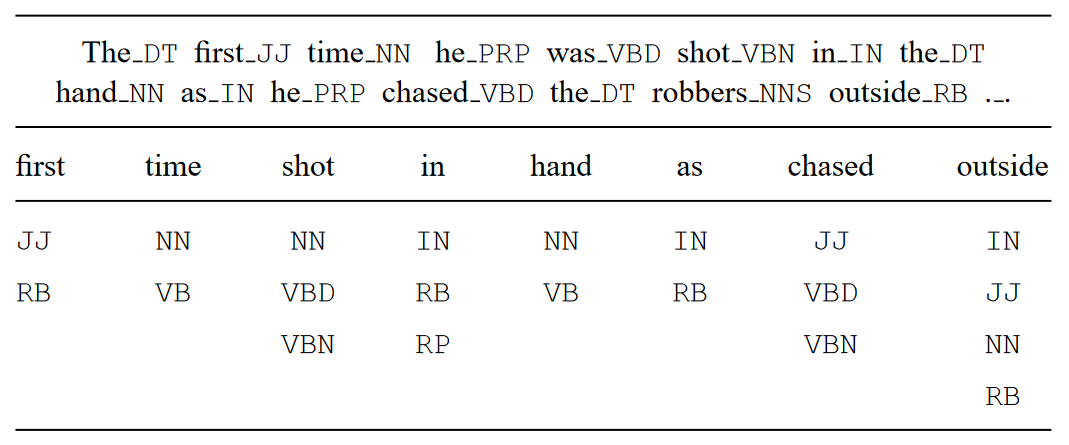

Some common tags

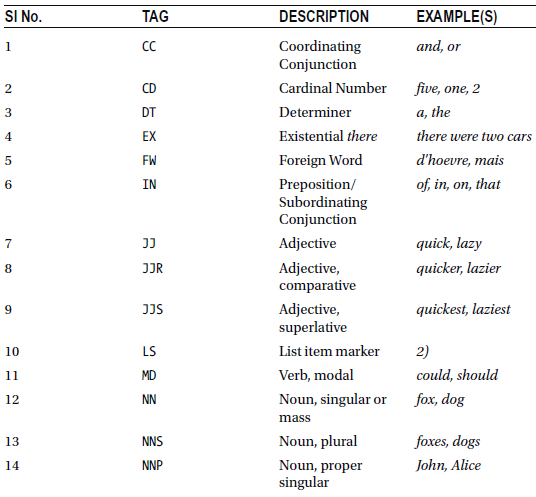

#### How does POS tag work?

* A POS tagger takes in a phrase or sentence and assigns the most probable part-of-speech tag to each word
* The set of predefined tags is called the tagset.
    - Example tags are NNS for a plural noun, 
    - VBD for a past tense verb
    - JJ for an adjective
* POS tagging itself is a challenging ML project
    - Rule-Based
    - Statistical such as Hidden Markov Model (HMM)
    - Neural network
    - etc

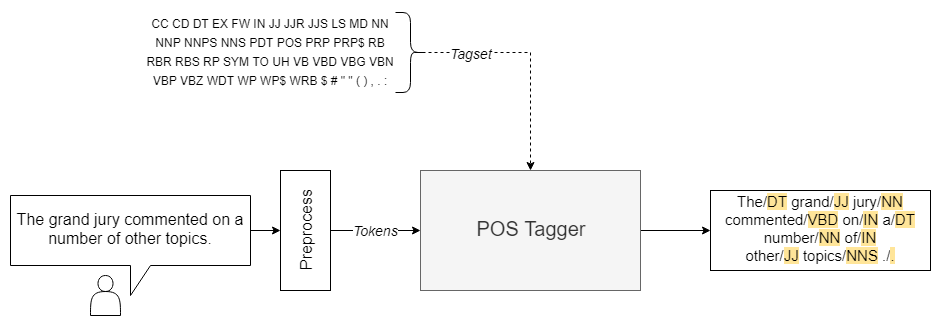

#### Fortunately NLTK provides pos_tag which is a machine-learning tagger that has been trained and saved for you. 

In [ ]:
nltk.download('averaged_perceptron_tagger') # you need to download in order to use pos_tag

In [ ]:
from nltk import pos_tag
pos_tag(['feet'])

#### nltk.pos_tag() returns a tuple with the POS tag. The key here is to map NLTK’s POS tags to the format wordnet lemmatizer would accept. 

In [ ]:
pos_tag(tokens)

In [ ]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
[wn.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
# POS helps to lemmatize 'learning' to 'learn'

### Feature Engineering: Vectorizing Data


#### Simple Bag of Words (BOW): 


#### sklearn.feature_extraction.text.CountVectorizer

* Convert a collection of text documents to a matrix of token counts
* If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

#### Combine stemming/lemmatizing with CountVectorizer

In [ ]:
corpus=["The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally.",
        "Text mining (a.k.a. text analytics) transforms the unstructured text into normalized, structured data suitable for analysis or machine learning algorithms.",
        "It is an improvement over Porter Stemmer hence we can see in the results how gracefully it handled input. There was lots of improvement done in this algorithm.",
       "Python nltk introduced SnowballStemmers that are used to create non-English Stemmers, so that you can generate your own set of rules for any languages."
       ]

corpus=map(remove_punct, corpus) #Remove punctuation

corpus=list(map(lambda i: word_tokenize(i.lower()), corpus)) # Tokenization

corpus=[[w for w in tokens if not w in stop_words] for tokens in corpus]# Remove stopwords

# corpus=[[snowBallStemmer.stem(word) for word in tokens] for tokens in corpus] # Stemming

corpus=[[wn.lemmatize(word, get_wordnet_pos(word)) for word in tokens] for tokens in corpus] # Lemmatizing

corpus

In [ ]:
corpus=[" ".join(tokens) for tokens in corpus]
corpus

In [ ]:
count_vect = CountVectorizer(analyzer='word')
X_counts = count_vect.fit_transform(corpus)
print(X_counts.shape)
print(count_vect.get_feature_names_out())
print(X_counts.toarray())

#### Reformat into dataframe

In [ ]:
import pandas as pd
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
X_counts_df.head(10)

#### N-Grams


In [ ]:
count_vect2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_counts2 = count_vect2.fit_transform(corpus)
print(X_counts2.shape)
print(count_vect2.get_feature_names_out())
print(X_counts2.toarray())

In [ ]:
X_counts_df2 = pd.DataFrame(X_counts2.toarray(), columns=count_vect2.get_feature_names_out())
X_counts_df2.head(10)

#### TF-IDF (term frequency–inverse document frequency)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word')
X_tfidf = tfidf_vect.fit_transform(corpus)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())
print(X_tfidf.toarray())

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_tfidf_df.head(10)

### Machine learning algorithms - a real example

In [ ]:
from nltk.corpus.reader.wordnet import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
nltk.download('words')
worddict = set(nltk.corpus.words.words())

In [ ]:
len(worddict)

In [ ]:
def preprocessing(text):
    wordset_n = set(wn.lemmatize(w, NOUN) for w in word_tokenize(text.lower().strip()))
    wordset_v = set(wn.lemmatize(w, VERB) for w in wordset_n)
    wordset = set(wn.lemmatize(w, ADJ) for w in wordset_v)
    wordset = wordset & worddict
    return ' '.join(list(wordset))

[tweets.csv](https://drive.google.com/file/d/1_TEL1OmBo4zgWs7MPVjwaynMKFlQoQmg/view?usp=sharing)

In [ ]:
data = pd.read_csv("data/tweets.csv") 
data['text']=data['Tweet'].apply(preprocessing)
data.head()

In [ ]:
data.info()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data['text'],
    data['emo'],
    test_size=0.3,
    random_state=1)

#### There are many algorithms to choose from, first we will try basic Naive Bayes Classifier and train the model on the training set.

In [ ]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False) # just use tf, no idf used

# convert the text list to tfidf form matrix
x_train_counts = count_vect.fit_transform(x_train)
x_train_tf = tf_transformer.fit_transform(x_train_counts)
y_train = np.array(y_train)

clf = MultinomialNB()
clf.fit(x_train_tf, y_train) # train the classifier

# convert list to matrix
x_pre_counts = count_vect.transform(x_test)
x_pre_tf = tf_transformer.transform(x_pre_counts)

predicted = clf.predict(x_pre_tf)

In [ ]:
x_train_tf

In [ ]:
print(list(filter(lambda x: x>0, x_train_tf.toarray()[3])))

#### Now the model is ready and trained. Now let us test the performance of our model on the test set to predict the emo labels.

In [ ]:
metrics.accuracy_score(list(y_test), predicted)

In [ ]:
cm = confusion_matrix(list(y_test), predicted)
cm

In [ ]:
list(np.unique(list(y_test)))

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
labels=list(np.unique(list(y_test)))
plt.title('Confusion matrix of the classifier', y=-0.1)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=40)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Parameter estimation using grid search with cross-validation

* Grid-search: 
    - It exhaustively searches overall parameter combinations in a given grid to determine the best model.
* Cross-validation: 
    - It divides a data set into k subsets and repeat the method k times where a different subset is used as the test set i.e in each iteration.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(x_train_tf, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

In [ ]:
gs_fit

In [ ]:
gs_fit.cv_results_

#### How to select the best model

* mean_test_score is the mean accuracy of your classification.
* The mean_test_score for n_estimators=300 and max_depth=60 gives the best result mean_test_score=0.968170. 
    - Where n_estimators is the number of trees in the forest.
    - max_depth is the max number of levels in each decision tree.

In [ ]:
clf = RandomForestClassifier(n_estimators=300, max_depth=60, random_state=0)
clf.fit(x_train_tf, y_train)
predicted = clf.predict(x_pre_tf)
metrics.accuracy_score(list(y_test), predicted)

In [ ]:
cm = confusion_matrix(list(y_test), predicted)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
labels=list(np.unique(list(y_test)))
plt.title('Confusion matrix of the classifier', y=-0.1)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=40)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

References:

https://github.com/lapolonio/machine-learning-for-nlp-guide

https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b

https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b

https://monkeylearn.com/text-analysis/

https://blog.parse.ly/post/7790/machine-learning-nlp-parse-ly-currents/

https://devopedia.org/part-of-speech-tagging

https://medium.com/@tusharsri/nlp-a-quick-guide-to-stemming-60f1ca5db49e

https://www.linguamatics.com/what-text-mining-text-analytics-and-natural-language-processing

https://github.com/keighrim/python-nlp-ml-tutorial/blob/master/NLTK.ipynb

https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

https://github.com/BadreeshShetty/Natural-Language-Processing-NLP-for-Machine-Learning/blob/master/NLP.ipynb

https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958

https://en.wikipedia.org/wiki/Tf%E2%80%93idf

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
